In [0]:
import pandas as pd
import numpy as np

In [0]:
from joblib import dump, load

In [0]:
from sklearn.metrics import accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("drive/My Drive/DL/Project/sign-language-mnist/sign_mnist_train.csv")
val = pd.read_csv("drive/My Drive/DL/Project/sign-language-mnist/sign_mnist_test.csv")

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
X_train = train.drop("label", axis=1).values
y_train = train["label"].values

X_val = val.drop("label", axis=1).values
y_val = val["label"].values

In [0]:
X_train = X_train/255
X_val = X_val/255
#normalize the data

In [0]:
i = np.random.permutation(len(X_train))
X_train = X_train[i]
y_train = y_train[i]
#randomly shuffle the data to prevent any aggregation

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=0.01, dual=False)
svm.fit(X_train, y_train)
print("Training accuracy = ", accuracy_score(svm.predict(X_train), y_train))
print("Validation accuracy = ", accuracy_score(svm.predict(X_val), y_val))
dump(svm, 'svm_full.joblib') 

Training accuracy =  0.9816426880349663
Validation accuracy =  0.6834913552704964


['svm_full.joblib']

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1, dual=False)
lr.fit(X_train, y_train)
print("Training accuracy = ", accuracy_score(lr.predict(X_train), y_train))
print("Validation accuracy = ", accuracy_score(lr.predict(X_val), y_val))
dump(lr, 'lr_full.joblib') 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy =  0.9734110362411218
Validation accuracy =  0.6889291689905187


['lr_full.joblib']

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Training accuracy = ", accuracy_score(nb.predict(X_train), y_train))
print("Validation accuracy = ", accuracy_score(nb.predict(X_val), y_val))
dump(nb, 'nb_full.joblib') 

Training accuracy =  0.4600254962666181
Validation accuracy =  0.3898494143892917


['nb_full.joblib']

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train, y_train)
print("Training accuracy = ", accuracy_score(tree.predict(X_train), y_train))
print("Validation accuracy = ", accuracy_score(tree.predict(X_val), y_val))
dump(tree, 'tree_full.joblib') 

Training accuracy =  0.9653615006374067
Validation accuracy =  0.41634132738427215


['tree_full.joblib']

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
print("Training accuracy = ", accuracy_score(forest.predict(X_train), y_train))
print("Validation accuracy = ", accuracy_score(forest.predict(X_val), y_val))
# dump(forest, 'forest_full.joblib') 

Training accuracy =  1.0
Validation accuracy =  0.8063301728945901


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, forest.predict(X_val)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       331
           1       0.96      0.94      0.95       432
           2       0.94      0.98      0.96       310
           3       0.90      0.98      0.94       245
           4       0.86      0.95      0.90       498
           5       0.93      0.91      0.92       247
           6       0.89      0.85      0.87       348
           7       0.98      0.91      0.94       436
           8       0.79      0.79      0.79       288
          10       0.74      0.70      0.72       331
          11       0.79      1.00      0.88       209
          12       0.79      0.63      0.70       394
          13       0.73      0.56      0.64       291
          14       0.98      0.88      0.93       246
          15       0.94      1.00      0.97       347
          16       0.91      0.98      0.94       164
          17       0.28      0.48      0.35       144
          18       0.58    

In [0]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=32)
pca.fit(X_train)
#project 784 features onto 32 principal components

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)

In [43]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_reduced, y_train)
print(accuracy_score(svm.predict(X_train_reduced), y_train))
print(accuracy_score(svm.predict(X_val_reduced), y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9876160990712074
0.8494143892916899


In [59]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train_reduced, y_train)
print(accuracy_score(svm.predict(X_train_reduced), y_train))
print(accuracy_score(svm.predict(X_val_reduced), y_val))

0.7171735567291933
0.6088957055214724


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_reduced, y_train)
print(accuracy_score(lr.predict(X_train_reduced), y_train))
print(accuracy_score(lr.predict(X_val_reduced), y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7312329266071754
0.6073619631901841


In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_reduced, y_train)
print(accuracy_score(nb.predict(X_train_reduced), y_train))
print(accuracy_score(nb.predict(X_val_reduced), y_val))

0.7659078492077945
0.6434746235359732


In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=12)
tree.fit(X_train_reduced, y_train)
print(accuracy_score(tree.predict(X_train_reduced), y_train))
print(accuracy_score(tree.predict(X_test_reduced), y_test))

0.8081223820797669
0.4252649191299498


In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_reduced, y_train)
print(accuracy_score(forest.predict(X_train_reduced), y_train))
print(accuracy_score(forest.predict(X_val_reduced), y_val))

1.0
0.7972671500278862


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_reduced, y_train)
print(accuracy_score(gb.predict(X_train_reduced), y_train))
print(accuracy_score(gb.predict(X_test_reduced), y_test))

0.9995993443817155
0.7116564417177914


In [10]:
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
datagen = image.ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=False,
      fill_mode='nearest')
#data augmentation

In [0]:
for i in range(len(X_train)):
  if i%100 == 0:
    print(i)
  curr_img = X_train[i].reshape(1, 28, 28, 1)
  j = 0
  for batch in datagen.flow(curr_img, batch_size=1):
    new_im = np.array(image.array_to_img(batch[0]))
    new_im = new_im.reshape(1, 784)
    X_train = np.append(X_train, new_im, axis=0)
    j += 1
    if j == 2:
        break
X_train[27455:] = X_train[27455:]/255
#generate augmented data

In [0]:
import matplotlib.pyplot as plt

In [61]:
from keras import models, layers, regularizers
model = models.Sequential()

Using TensorFlow backend.
W0624 13:37:37.692433 140361711998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
#categorical encoding

In [65]:
from keras import models, layers, regularizers
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(784,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

W0624 13:39:24.567578 140361711998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 13:39:24.570854 140361711998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 13:39:24.593585 140361711998848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0624 13:39:24.602128 140361711998848 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 25)                19625     
Total params: 635,065
Trainable params: 635,065
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#use the RMSProp optimizer with categorical crossentropy as the loss

In [0]:
from keras.utils import to_categorical

In [79]:
for i in range(500):
  print("Iter ", i+1)
  model.fit(X_train, y_train_cat, epochs=1, batch_size=27455)
  if i%10 == 0:
    train_acc.append(model.evaluate(X_train, y_train_cat))
    val_acc.append(model.evaluate(X_val, y_val_cat))
  

Iter  1
Epoch 1/1
7172/7172 [==============================] - 0s 45us/step
Iter  2
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 0.9412 - acc: 0.8096
Iter  3
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 0.9838 - acc: 0.7804
Iter  4
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 1.1046 - acc: 0.7559
Iter  5
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 1.0373 - acc: 0.7645
Iter  6
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 1.0173 - acc: 0.7925
Iter  7
Epoch 1/1
27455/27455 [==============================] - 0s 6us/step - loss: 0.8678 - acc: 0.8381
Iter  8
Epoch 1/1
27455/27455 [==============================] - 0s 8us/step - loss: 0.7487 - acc: 0.8813
Iter  9
Epoch 1/1
27455/27455 [==============================] - 0s 7us/step - loss: 0.7582 - acc: 0.8707
Iter  10
Epoch 1/1
27455/27455 [==============================] - 0s 8us/ste

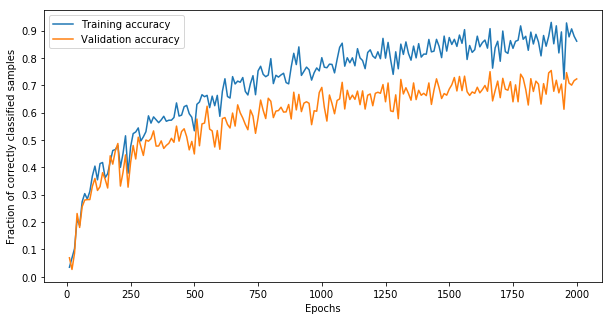

In [83]:
import matplotlib.pyplot as plt
x_vals = [10*i for i in (range(1, len(train_acc)+1))]
plt.figure(figsize=(10,5))
plt.xlabel("Epochs")
plt.ylabel("Fraction of correctly classified samples")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.plot(x_vals, np.array(train_acc)[:, 1], label='Training accuracy')
plt.plot(x_vals, np.array(val_acc)[:, 1], label='Validation accuracy')
plt.legend()

In [82]:
model.evaluate(X_val, y_val_cat)

7172/7172 [==============================] - 0s 47us/step


[1.0568583717375446, 0.770914668153932]

In [0]:
X_train = X_train.reshape(27455, 28, 28, 1)
X_val = X_val.reshape(7172, 28, 28, 1)

In [113]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='softmax'))
model.summary()
#final model - CNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
conv_train = []
conv_val = []

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [119]:
for i in range(500):
  print("Iter ", i+1)
  model.fit(X_train, y_train_cat, epochs=1, batch_size=27455)
  if i%5 == 0:
    conv_train.append(model.evaluate(X_train, y_train_cat))
    conv_val.append(model.evaluate(X_val, y_val_cat))

Iter  1
Epoch 1/1
7172/7172 [==============================] - 0s 55us/step
Iter  2
Epoch 1/1
27455/27455 [==============================] - 1s 24us/step - loss: 0.3515 - acc: 0.8786
Iter  3
Epoch 1/1
27455/27455 [==============================] - 1s 23us/step - loss: 0.3384 - acc: 0.8828
Iter  4
Epoch 1/1
27455/27455 [==============================] - 1s 23us/step - loss: 0.3248 - acc: 0.8882
Iter  5
Epoch 1/1
27455/27455 [==============================] - 1s 22us/step - loss: 0.3189 - acc: 0.8903
Iter  6
Epoch 1/1
7172/7172 [==============================] - 0s 56us/step
Iter  7
Epoch 1/1
27455/27455 [==============================] - 1s 23us/step - loss: 0.3106 - acc: 0.8950
Iter  8
Epoch 1/1
27455/27455 [==============================] - 1s 23us/step - loss: 0.3024 - acc: 0.8969
Iter  9
Epoch 1/1
27455/27455 [==============================] - 1s 22us/step - loss: 0.3214 - acc: 0.8901
Iter  10
Epoch 1/1
27455/27455 [==============================] - 1s 23us/step - loss: 0.3202 - acc

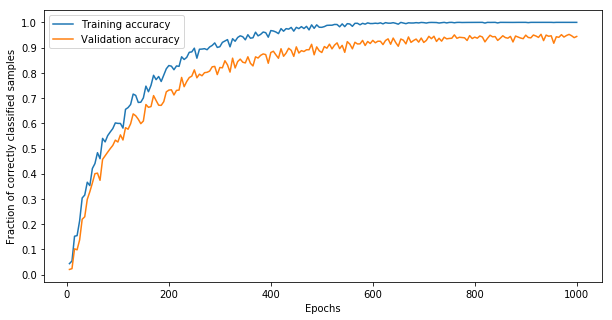

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
x_vals = [5*i for i in (range(1, len(conv_train)+1))]
plt.xlabel("Epochs")
plt.ylabel("Fraction of correctly classified samples")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.plot(x_vals, np.array(conv_train)[:, 1], label='Training accuracy')
plt.plot(x_vals, np.array(conv_val)[:, 1], label='Validation accuracy')
plt.legend()

In [126]:
model.evaluate(X_val, y_val_cat)

7172/7172 [==============================] - 0s 61us/step


[0.1676006174630216, 0.9457612939208031]

In [0]:
model.save("drive/My Drive/DL/Project/cnn_model_no_flip")